In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = "https://www.worldometers.info/coronavirus/"
r = requests.get(url)
html = r.text
soup = BeautifulSoup(html,'html.parser')
print(soup.title.text)
print()
print()
live_data=soup.find_all('div',id='maincounter-wrap')
print(live_data)
for i in live_data:
    print(i.text)

Coronavirus Update (Live): 23,158,816 Cases and 803,950 Deaths from COVID-19 Virus Pandemic - Worldometer


[<div id="maincounter-wrap" style="margin-top:15px">
<h1>Coronavirus Cases:</h1>
<div class="maincounter-number">
<span style="color:#aaa">23,158,816 </span>
</div>
</div>, <div id="maincounter-wrap" style="margin-top:15px">
<h1>Deaths:</h1>
<div class="maincounter-number">
<span>803,950</span>
</div>
</div>, <div id="maincounter-wrap" style="margin-top:15px;">
<h1>Recovered:</h1>
<div class="maincounter-number" style="color:#8ACA2B ">
<span>15,739,506</span>
</div>
</div>]

Coronavirus Cases:

23,158,816 



Deaths:

803,950



Recovered:

15,739,506




In [3]:

table_body = soup.find("tbody")
table_rows =table_body.find_all('tr')

In [4]:

country = []
totalcases = []
newcases = []
totaldeaths = []
newdeaths = []
totalrecovered = []
ActiveCases=[]
SeriousCases=[]
Population=[]
for tr in table_rows:
    td=tr.find_all('td')
    country.append(td[1].text)
    totalcases.append(td[2].text)
    newcases.append(td[3].text)
    totaldeaths.append(td[4].text)
    newdeaths.append(td[5].text)
    totalrecovered.append(td[6].text)
    ActiveCases.append(td[7].text)
    SeriousCases.append(td[8].text)
    Population.append(td[13].text)

In [5]:

headers = ['country','totalcases','newcases','totaldeaths','newdeaths ','totalrecovered',' ActiveCases','SeriousCases','Population']

In [6]:

prepared_list=list(zip(country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,ActiveCases,SeriousCases,Population))
del prepared_list [:8]
data_frame = pd.DataFrame(prepared_list,columns=headers)

In [7]:
data_frame.to_csv("C:\\Users\\ankit-smith\\Desktop\\project\\Data.csv")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv("C:\\Users\\ankit-smith\\Desktop\\project\\Data.csv")

In [10]:
data

,Unnamed: 0,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,ActiveCases,SeriousCases,Population
0,0,USA,"5,799,148","+2,421","179,240",40.0,"3,127,418",NaN,"2,492,490","225,547"
1,1,Brazil,"3,536,488",NaN,"113,454",NaN,"2,670,755",NaN,"752,279","66,476"
2,2,India,"2,985,367","+11,999","56,030",102.0,"2,228,248","+7,449","701,089","24,959"
3,3,Russia,"951,897","+4,921","16,310",121.0,"767,477","+6,147","168,110","231,693"
4,4,South Africa,"603,338",NaN,"12,843",NaN,"500,102",NaN,"90,393","58,986"
...,...,...,...,...,...,...,...,...,...,...
210,210,Western Sahara,10,NaN,1,NaN,8,NaN,1,NaN
211,211,MS Zaandam,9,NaN,2,NaN,NaN,NaN,7,NaN
212,212,Saint Pierre Miquelon,5,NaN,,NaN,1,NaN,4,NaN
213,213,Anguilla,3,NaN,,NaN,3,NaN,0,"44,069"


In [11]:
data.head(7)

,Unnamed: 0,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,ActiveCases,SeriousCases,Population
0,0,USA,"5,799,148","+2,421","179,240",40.0,"3,127,418",NaN,"2,492,490","225,547"
1,1,Brazil,"3,536,488",NaN,"113,454",NaN,"2,670,755",NaN,"752,279","66,476"
2,2,India,"2,985,367","+11,999","56,030",102.0,"2,228,248","+7,449","701,089","24,959"
3,3,Russia,"951,897","+4,921","16,310",121.0,"767,477","+6,147","168,110","231,693"
4,4,South Africa,"603,338",NaN,"12,843",NaN,"500,102",NaN,"90,393","58,986"
5,5,Peru,"576,067",NaN,"27,245",NaN,"384,908",NaN,"163,914","88,251"
6,6,Mexico,"549,734","+5,928","59,610",504.0,"376,409","+4,771","113,715","9,597"


In [12]:
data.tail()

,Unnamed: 0,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,ActiveCases,SeriousCases,Population
210,210,Western Sahara,10,NaN,1,NaN,8,NaN,1,NaN
211,211,MS Zaandam,9,NaN,2,NaN,NaN,NaN,7,NaN
212,212,Saint Pierre Miquelon,5,NaN,,NaN,1,NaN,4,NaN
213,213,Anguilla,3,NaN,,NaN,3,NaN,0,"44,069"
214,214,China,"84,939",+22,"4,634",NaN,"79,851",+59,454,"62,814"


In [13]:
data.shape

(215, 10)

In [14]:
data1 = data[:10]

In [15]:
data1

,Unnamed: 0,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,ActiveCases,SeriousCases,Population
0,0,USA,"5,799,148","+2,421","179,240",40.0,"3,127,418",NaN,"2,492,490","225,547"
1,1,Brazil,"3,536,488",NaN,"113,454",NaN,"2,670,755",NaN,"752,279","66,476"
2,2,India,"2,985,367","+11,999","56,030",102.0,"2,228,248","+7,449","701,089","24,959"
3,3,Russia,"951,897","+4,921","16,310",121.0,"767,477","+6,147","168,110","231,693"
4,4,South Africa,"603,338",NaN,"12,843",NaN,"500,102",NaN,"90,393","58,986"
5,5,Peru,"576,067",NaN,"27,245",NaN,"384,908",NaN,"163,914","88,251"
6,6,Mexico,"549,734","+5,928","59,610",504.0,"376,409","+4,771","113,715","9,597"
7,7,Colombia,"522,138",NaN,"16,568",NaN,"348,940",NaN,"156,630","47,288"
8,8,Spain,"407,879",NaN,"28,838",NaN,NaN,NaN,NaN,"170,147"
9,9,Chile,"393,769",NaN,"10,723",NaN,"367,897",NaN,"15,149","111,932"


In [16]:
country = data1["country"]

In [17]:
totalcases = data1["totalcases"]

In [18]:
totaldeaths = data1["totaldeaths"]

In [19]:
data1.iloc[9]

Unnamed: 0              9
country             Chile
totalcases        393,769
newcases              NaN
totaldeaths       10,723 
newdeaths             NaN
totalrecovered    367,897
 ActiveCases          NaN
SeriousCases       15,149
Population        111,932
Name: 9, dtype: object

In [20]:
data1['totalrecovered'].dropna()


0    3,127,418
1    2,670,755
2    2,228,248
3      767,477
4      500,102
5      384,908
6      376,409
7      348,940
9      367,897
Name: totalrecovered, dtype: object

In [21]:
totalrecovered=data1['totalrecovered']

In [22]:
w=list(totalrecovered)

In [23]:
z=list(totaldeaths)

In [24]:
x = list(country)

In [25]:
y = list(totalcases)

In [26]:
x

['USA',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Peru',
 'Mexico',
 'Colombia',
 'Spain',
 'Chile']

In [27]:
y

['5,799,148',
 '3,536,488',
 '2,985,367',
 '951,897',
 '603,338',
 '576,067',
 '549,734',
 '522,138',
 '407,879',
 '393,769']

In [28]:
z

['179,240 ',
 '113,454 ',
 '56,030 ',
 '16,310 ',
 '12,843 ',
 '27,245 ',
 '59,610 ',
 '16,568 ',
 '28,838 ',
 '10,723 ']

In [29]:
w

['3,127,418',
 '2,670,755',
 '2,228,248',
 '767,477',
 '500,102',
 '384,908',
 '376,409',
 '348,940',
 nan,
 '367,897']

# graph of Newcases with respect to country's

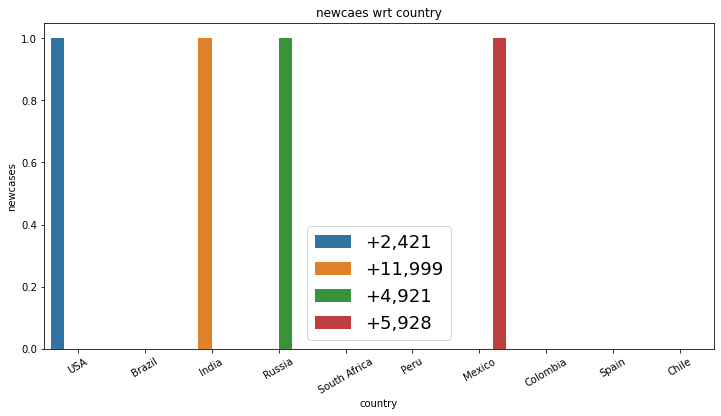

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'country',hue='newcases',data=data1)
plt.title('newcaes wrt country')
plt.ylabel('newcases')
plt.legend(loc='lower center',prop={'size': 18})
plt.xticks(rotation=30)
plt.show()

# graph of totalcases with respect to country's

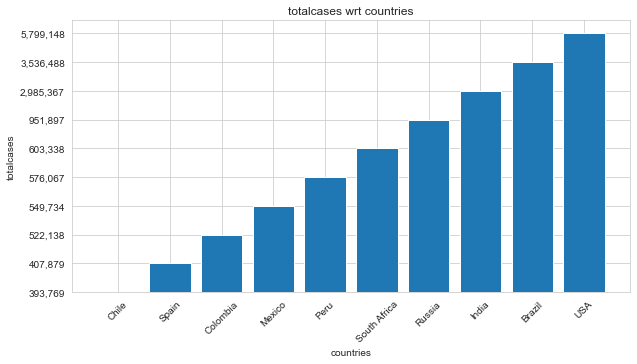

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.bar(x[::-1] ,y[::-1])
plt.xticks(rotation=45)
plt.title('totalcases wrt countries')
plt.xlabel('countries')
plt.ylabel('totalcases')
plt.show()


# graph of totaldeath with respect to country's

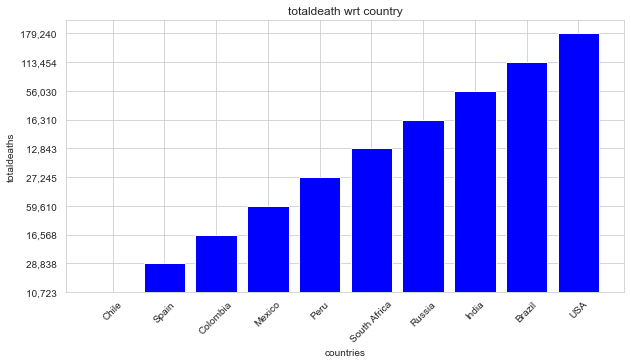

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.bar(x[::-1],z[::-1],color='b')
plt.xticks(rotation=45)
plt.title('totaldeath wrt country')
plt.xlabel('countries')
plt.ylabel('totaldeaths')
plt.show()

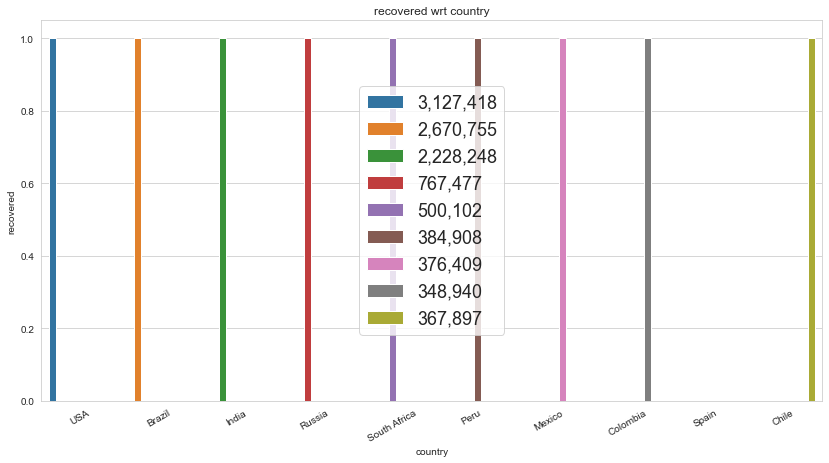

In [33]:
plt.figure(figsize=(14,7))
sns.countplot(x = 'country',hue='totalrecovered',data=data1)
plt.title('recovered wrt country')
plt.ylabel('recovered')
plt.legend(loc='center',prop={'size': 18})
plt.xticks(rotation=30)
plt.show()